In [3]:
import numpy as np
import pandas as pd
from google.colab import drive

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dataset = pd.read_csv("/content/gdrive/MyDrive/fuel_train.csv")
dataset = pd.DataFrame(dataset)
dataset

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,VOLKSWAGEN,GTI,COMPACT,2.0,4,M5,X,11.2,228
1,2000,DODGE,DAKOTA 4X4,PICKUP TRUCK - STANDARD,4.7,8,M5,X,18.8,382
2,2000,GMC,C1500 SIERRA,PICKUP TRUCK - STANDARD,4.8,8,M5,X,18.9,373
3,2000,FORD,F150 4X4,PICKUP TRUCK - STANDARD,4.6,8,A4,X,18.5,380
4,2000,FORD,F150 4X4,PICKUP TRUCK - STANDARD,4.2,6,A4,X,17.3,359
...,...,...,...,...,...,...,...,...,...,...
506,2000,CHEVROLET,ASTRO AWD CARGO,VAN - CARGO,4.3,6,A4,X,17.0,350
507,2000,CHEVROLET,K1500 SILVERADO 4X4,PICKUP TRUCK - STANDARD,4.3,6,M5,X,18.7,386
508,2000,FORD,TAURUS,MID-SIZE,3.0,6,A4,X,13.6,267
509,2000,MERCEDES-BENZ,SLK 230 KOMPRESSOR #,SUBCOMPACT,2.3,4,M5,Z,12.6,246


In [ ]:
dataset.columns = dataset.columns.str.strip()  # Removes leading and trailing spaces
dataset.isnull().sum() # Check for missing values
dataset.duplicated().sum() # Check for duplicate values


1

In [ ]:
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)

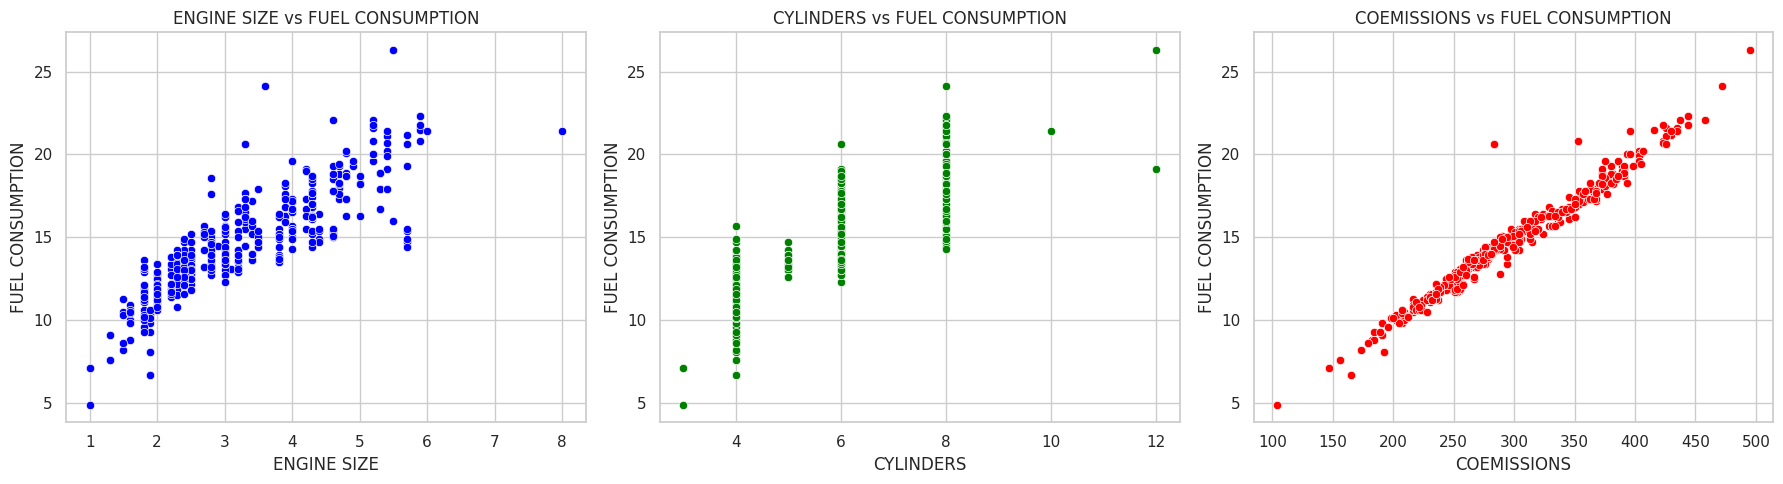

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is a DataFrame with relevant columns
X = dataset[['ENGINE SIZE', 'CYLINDERS', 'COEMISSIONS']]  # Features
Y = dataset['FUEL CONSUMPTION']  # Target

# Set the plot style
sns.set(style="whitegrid")

# Create subplots for each feature vs FUEL CONSUMPTION
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot for ENGINE SIZE vs FUEL CONSUMPTION
sns.scatterplot(x=X['ENGINE SIZE'], y=Y, ax=axs[0], color='blue')
axs[0].set_xlabel('ENGINE SIZE')
axs[0].set_ylabel('FUEL CONSUMPTION')
axs[0].set_title('ENGINE SIZE vs FUEL CONSUMPTION')

# Scatter plot for CYLINDERS vs FUEL CONSUMPTION
sns.scatterplot(x=X['CYLINDERS'], y=Y, ax=axs[1], color='green')
axs[1].set_xlabel('CYLINDERS')
axs[1].set_ylabel('FUEL CONSUMPTION')
axs[1].set_title('CYLINDERS vs FUEL CONSUMPTION')

# Scatter plot for COEMISSIONS vs FUEL CONSUMPTION
sns.scatterplot(x=X['COEMISSIONS'], y=Y, ax=axs[2], color='red')
axs[2].set_xlabel('COEMISSIONS')
axs[2].set_ylabel('FUEL CONSUMPTION')
axs[2].set_title('COEMISSIONS vs FUEL CONSUMPTION')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Split into X and Y
X = dataset[['ENGINE SIZE','CYLINDERS','COEMISSIONS']] # Features (independent)
Y = dataset['FUEL CONSUMPTION'].values.reshape(-1, 1) # Target (dependent)
X = np.c_[np.ones(X.shape[0]), X] # Adding a column of 1s for constant in matrix multiplication


In [ ]:
# Split X and Y into training and testing set in 8:2
#split_size = int(0.75*len(dataset))
#X, X_test = X[:split_size].copy(), X[split_size:].copy()
#Y, Y_test = Y[:split_size].copy(), Y[split_size:].copy()



In [ ]:
# Shape
print(X.shape)
print(Y.shape)

(510, 4)
(510, 1)


In [ ]:
# Linear Regression - Matrix version
# L = learning rate
# n = interations
def linear_regress(x,y,L,n):

  w = np.zeros((x.shape[1],1)) # Initialize W to all zeros

  cost_list=[]

  for i in range(n):
    y_pred = np.dot(x,w)
    cost = (1/(2*len(y)))*(np.sum(np.square(y-y_pred)))
    gd = 1/len(y) * np.dot(x.T,(y_pred-y))
    w = w - L*gd

    if i%100==0:
      cost_list.append(cost)

  return w, cost_list




In [1]:
y = np.random.randint(0,10,size=(10,1))
print(y)
len(y)

NameError: name 'np' is not defined

In [43]:
w = np.random.randint(0,10,size=(X.shape[1],1))
w[0] -= w[0]*2
print(X[0])
print(X[3][3])

[  1.   2.   4. 228.]
380.0


In [ ]:
# Cost func
# If we update w and put entire thing in loop we can get all MSE
# Need G.D. for updated w

def cost_func(x,y):  #for given thetas (w)
  y_pred = np.random.randint(0,1,size=(len(y),1)) # Initialise column with 0s
  w = np.random.randint(0,1,size=(x.shape[1],1)) # Initialise W for only 1st iteration (to chk)
  MSE = 0
  for i in range(len(y)):
    y_pred[i] = np.dot(x[i],w) # Predict y for row i
    MSE += np.square(y[i] - y_pred[i]) # MSE for row i
  MSE = MSE/(2*len(y)) # MSE for all rows
  return MSE

cost_func(X,Y)

array([110.43265686])

In [ ]:
# To chk cost
w = np.zeros((X.shape[1],1)) # Initialize W to all zeros
gd=[]; cost=0
for i in range(1):
  y_pred = np.dot(X,w)
  cost = (1/(2*len(Y)))*(np.sum(np.square(Y-y_pred)))
  gd = 1/len(Y) * np.dot(X.T,(y_pred-Y))
  w = w - 0.00001*gd

print(gd)
print("---")
print(w)



[[  -14.52254902]
 [  -49.81703922]
 [  -86.99960784]
 [-4449.9327451 ]]
---
[[0.00014523]
 [0.00049817]
 [0.00087   ]
 [0.04449933]]


In [ ]:
# Gradiant Descent

W = np.random.randint(0,1,size=(X.shape[1],1)).astype(np.float64) # Initialise W to 0s

def gradiant_descent(x,y,L,w):

    #derivative of MSE function with each Xi
    #update Xi = Xi - L*gd

    #gd is when we update all values in w
    #we do gd everytime for n iterations
    #here only once is needed

    w0=0;w1=0;w2=0;w3=0;
    for i in range(len(y)):
      w0 += -(2/len(y)) * (y - (w[0]*(x[i][0]) + w[1] + w[2] +w[3]))
      w1 += -(2/len(y)) * (y - (w[0]*(x[i][1]) + w[1] + w[2] +w[3]))*x[i][1]
      w2 += -(2/len(y)) * (y - (w[0]*(x[i][2]) + w[1] + w[2] +w[3]))*x[i][2]
      w3 += -(2/len(y)) * (y - (w[0]*(x[i][3]) + w[1] + w[2] +w[3]))*x[i][3]

    w[0]-= L*w0
    w[1]-= L*w1
    w[2]-= L*w2
    w[3]-= L*w3

    return w

gradiant_descent(X,Y,0.00001,W)

ValueError: cannot reshape array of size 510 into shape (1,)

In [ ]:
L = 0.00001
n = 10
w,cost_list = linear_regress(X,Y,L,n)
print(w)
print(cost_list)

[[0.0001621 ]
 [0.00056277]
 [0.00098557]
 [0.04952055]]
[110.43265686274509]
